# III. 🤖 Model Building

Predicting the salary based on job state, company rating, company industry and other variables.

#### Importing essential librairies

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("../data/processed/glassdoor-data-engineer-eda.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,job_simp,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_devops,job_education,job_experience
0,PCS Global Tech,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\r\n· Analyze and organize raw...,70000,501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,...,data engineer,na,"['sql', 'python', 'java']",[],[],[],[],[],NaN,0-2 years
1,Futuretech Consultants LLC,4.0,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,76500,NaN,NaN,NaN,NaN,...,data engineer,na,['sql'],['snowflake'],['ssis'],['snowflake'],[],[],bachelor,2-5 years
2,Clairvoyant,4.4,Remote,Data Engineer (MDM),Required Skills:\r\nMust have 5-8+ Years of ex...,121500,51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,data engineer,na,"['sql', 'python']","['databricks', 'aws']",[],[],['spark'],[],master,0-2 years
3,Apple,4.2,"Cupertino, CA",Data Engineer,"Summary\r\nPosted: Dec 22, 2021\r\nWeekly Hour...",111693,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,...,data engineer,na,['python'],[],['tableau'],[],[],[],NaN,NaN
4,Skytech Consultancy Services,5.0,"Baltimore, MD",Data Engineer,Description of Work:\r\nTechnical experience i...,117000,1 to 50 Employees,Company - Public,NaN,NaN,...,data engineer,na,['sql'],[],['tableau'],['oracle'],[],[],bachelor,5-10 years


#### Feature Engineering

Making a new dataframe with relevant features for the regression model

In [3]:
cols_model = ['job_state', 'seniority', 'job_education', 'job_experience', 'company_industry', 'company_rating', 'salary_estimate']

df_model = df[cols_model]
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,CA,na,NaN,0-2 years,Information Technology Support Services,4.7,70000
1,MS,na,bachelor,2-5 years,NaN,4.0,76500
2,Remote,na,master,0-2 years,Biotech & Pharmaceuticals,4.4,121500
3,CA,na,NaN,NaN,Computer Hardware Development,4.2,111693
4,MD,na,bachelor,5-10 years,NaN,5.0,117000


Dropping some states and company industries that have below 5 data points.

In [4]:
df_model['job_state'].value_counts()

Remote          67
CA              34
TX              30
GA              23
NJ              20
IL              13
NY              12
DC              12
VA              11
MA              11
PA               9
MN               8
FL               8
NC               7
CO               6
WI               6
OH               6
MD               5
OR               4
SC               3
DE               3
UT               3
MS               2
California       2
TN               2
AZ               2
Minnesota        2
AR               1
Manhattan        1
MO               1
KY               1
WA               1
AL               1
NE               1
Pennsylvania     1
OK               1
Illinois         1
Oregon           1
KS               1
CT               1
MI               1
Name: job_state, dtype: int64

In [6]:
states_g15 = ["Remote","CA","TX","GA","NJ","IL","NY","DC","VA","MA","PA","MN","FL","NC","CO","WI","OH"]

df_model = df_model[df_model["job_state"].isin(states_g15)]
df_model['job_state'].value_counts()

Remote    67
CA        34
TX        30
GA        23
NJ        20
IL        13
NY        12
DC        12
VA        11
MA        11
PA         9
MN         8
FL         8
NC         7
WI         6
OH         6
CO         6
Name: job_state, dtype: int64

One Hot Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le_state = LabelEncoder()
df_model['job_state'] = le_state.fit_transform(df_model['job_state'])
df_model['job_state'].unique()

array([ 0, 13,  6,  4, 14,  7, 10, 15,  9,  2, 16,  5, 12, 11,  1,  8,  3])

In [11]:
le_sen = LabelEncoder()
df_model['seniority'] = le_sen.fit_transform(df_model['seniority'])
df_model['seniority'].unique()

array([0, 1])

In [12]:
le_edu = LabelEncoder()
df_model['job_education'] = le_edu.fit_transform(df_model['job_education'])
df_model['job_education'].unique()

array([2, 1, 0])

In [13]:
le_indu = LabelEncoder()
df_model['company_industry'] = le_indu.fit_transform(df_model['company_industry'])
df_model['company_industry'].unique()

array([26,  6, 12, 25, 29, 24, 49, 13, 30,  0,  8, 18, 19, 42,  4, 46,  3,
       41, 34,  2, 40,  5, 36, 20, 17,  1, 48, 15, 31, 14, 38, 35, 37, 44,
       16, 33, 45, 10, 32, 39, 47, 23, 27, 21, 28, 43, 11, 22,  7,  9])

In [14]:
unique_company_ratings = np.sort(df_model['company_rating'].unique())
unique_company_ratings

array([1. , 2. , 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4,
       3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7,
       4.8, 4.9, 5. ])

In [15]:
le_rating = LabelEncoder()
df_model['company_rating'] = le_rating.fit_transform(df_model['company_rating'])
df_model['company_rating'].unique()

array([25, 22, 20,  5, 16, 26, 28, 19,  0,  9, 13, 18, 23, 21, 10,  4, 14,
       27,  6, 17, 24, 15, 12,  8, 11,  1,  7,  3,  2], dtype=int64)

In [16]:
le_exp = LabelEncoder()
df_model['job_experience'] = le_exp.fit_transform(df_model['job_experience'])
df_model['job_experience'].unique()

array([1, 4, 0, 3, 2])

In [17]:
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,0,0,2,1,26,25,70000
2,13,0,1,1,6,22,121500
3,0,0,2,4,12,20,111693
5,6,0,0,0,25,5,94536
6,0,0,2,0,29,16,105700


<Axes: >

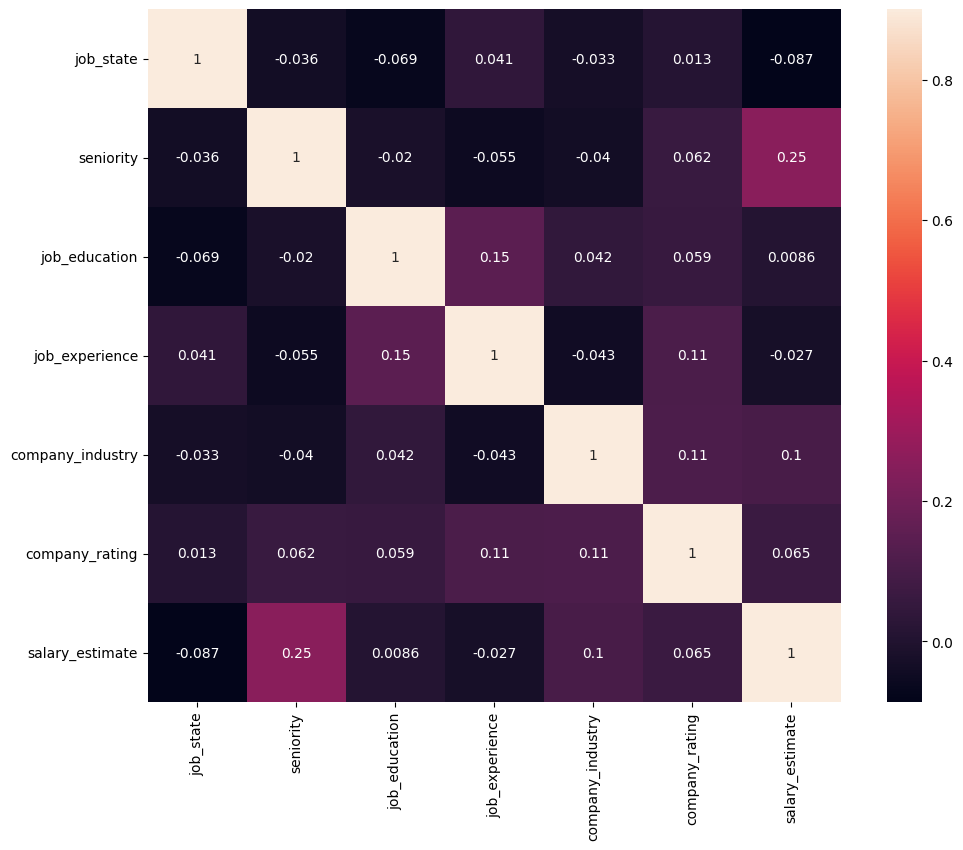

In [18]:
corrmat = df_model.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, annot=True, square=True)

The salary is moderatly correlated with the seniority, company industry and company rating. Suprisingly it is negatively correlated with the job experience needed and the job state.

### Multiple Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
predictions = model.predict(X_test)

In [40]:
print(f'Mean Absolute Error : ${round(mean_absolute_error(y_test, predictions), 2)}')

Mean Absolute Error : $16471.19


In [37]:
error = np.sqrt(mean_squared_error(y_test, predictions))
print("Error : ${:,.02f}".format(error))   

Error : $21,427.26


### Random Forest Regressor Model

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

In [35]:
max_depth = [None, 2, 4, 6, 8, 10, 12]

parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(n_estimators = 100, random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [41]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(f'Mean Absolute Error : ${round(mean_absolute_error(y_test, y_pred), 2)}')
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Error : ${:,.02f}".format(error))    

Mean Absolute Error : $15499.72
Error : $20,698.41


In [42]:
errors = abs(y_pred - y_test)

In [43]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 85.11 %


Variable Importances

In [44]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(cols_model, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: seniority            Importance: 0.39
Variable: company_industry     Importance: 0.28
Variable: job_state            Importance: 0.16
Variable: company_rating       Importance: 0.13
Variable: job_experience       Importance: 0.03
Variable: job_education        Importance: 0.01


[None, None, None, None, None, None]

Let's test our model on an example

In [45]:
# job_state, seniority, job_education, job_experience, company_industry, company_rating

X_example =  np.array([["CA", "senior", "bachelor", "0-2 years", "Information Technology Support Services", 4.5]])

In [46]:
X_example[:, 0] = le_state.transform(X_example[:,0])
X_example[:, 1] = le_sen.transform(X_example[:,1])
X_example[:, 2] = le_edu.transform(X_example[:,2])
X_example[:, 3] = le_exp.transform(X_example[:,3])
X_example[:, 4] = le_indu.transform(X_example[:,4])
X_example[:, 5] = le_rating.transform(X_example[:,5])

X_example = X_example.astype(float)
X_example

array([[ 0.,  1.,  0.,  1., 26., 23.]])

In [47]:
y_pred = regressor.predict(X_example)
y_pred[0]

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


118928.54186293801

For a senior data engineer who's looking to work in California (CA) state, with a bachelor, 0-2 years of experience and in a company in the IT Support Services industry that has a 4.5 rating on Glassdoor, he is expected to get $118,928 /year.

Exporting the model to a pickle file

In [48]:
import pickle

data = {"model": regressor, "le_state": le_state, "le_sen": le_sen, "le_edu": le_edu, "le_exp": le_exp, "le_indu": le_indu, "le_rating": le_rating}

with open('../models/model_salary_pred.pkl', 'wb') as file:
    pickle.dump(data, file)

Let's test our model after importing it from the pickle file

In [49]:
with open('../models/model_salary_pred.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_state = data["le_state"]
le_sen = data["le_sen"]
le_edu = data["le_edu"]
le_exp = data["le_exp"]
le_indu = data["le_indu"]
le_rating = data["le_rating"]

In [50]:
y_pred = regressor_loaded.predict(X_example)
y_pred[0].round()

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


118929.0